<div style="border:2px solid #030833; border-radius:10px;  background:#fff;">
    <div style="padding:10px 10px 10px 0px; margin:2px; border-radius:10px; background:#410F01;">
        <span style="margin-left:15px; font-family:sans-serif; font-size:20px; color:#fff;">Install required libraries... 📥 </span>
    </div>
</div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import re, string, unicodedata
from string import punctuation
from termcolor import colored
from collections import Counter

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import keras
import tensorflow as tf
from keras.preprocessing import text, sequence
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.text import Tokenizer

import nltk
from nltk.corpus import stopwords
from textblob import Word
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn import set_config
set_config(print_changed_only = False)

#to see full text:
pd.set_option("display.max_colwidth", -1)

print(colored("\nNECESSARY LIBRARIES WERE SUCCESFULLY IMPORTED...", color = "green", attrs = ["bold", "dark"]))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...



NECESSARY LIBRARIES WERE SUCCESFULLY IMPORTED...


In [2]:
data = pd.read_csv("../input/sms-spam-collection-dataset/spam.csv", encoding = "ISO-8859-1", engine = "python")

print(colored("\nDATASETS WERE SUCCESFULLY LOADED...",  color = "green", attrs = ["bold", "dark"]))


DATASETS WERE SUCCESFULLY LOADED...


### <span style = "background:#410F01; border:black solid; font-size:100%; color:#fff; border-radius:10px;">Look at the dataset</span>

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives around here though",NaN,NaN,NaN


In [4]:
#rename dataset columns
data.rename(columns = {"v1": "target", "v2": "text"}, inplace = True)

#drop unnecessary columns
data.drop(["Unnamed: 2","Unnamed: 3", "Unnamed: 4"], axis = 1, inplace = True)

print(colored("\nOPERATIONS ON DATASETS WERE SUCCESFULLY COMPLETED...",  color = "green", attrs = ["bold", "dark"]))


OPERATIONS ON DATASETS WERE SUCCESFULLY COMPLETED...


In [5]:
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


### <span style = "background:#410F01; border:black solid; font-size:100%; color:#fff; border-radius:5px;">Initial basic information about dataset</span>

In [6]:
data.info(memory_usage = True, verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


### <span style = "background:#410F01; border:black solid; font-size:100%; color:#fff; border-radius:5px;">Check whether there are duplicated values in dataset</span>

In [7]:
print(colored("There are {} duplicated values in the dataset".format(data.duplicated().sum()), color = "green", attrs = ["bold", "dark"]))

There are 403 duplicated values in the dataset


### <span style = "background:#410F01; border:black solid; font-size:100%; color:#fff; border-radius:5px;">Drop duplicated values from the dataset</span>

In [8]:
data.drop_duplicates(inplace = True)

print(colored("\nDUPLICATED VALUES WERE SUCCESFULLY DROPPED...", color = "green", attrs = ["bold", "dark"]))


DUPLICATED VALUES WERE SUCCESFULLY DROPPED...


### <span style = "background:#410F01; border:black solid; font-size:100%; color:#fff; border-radius:5px;">Look class frequencies of 'target' variable</span>

In [9]:
grouped_target = data.groupby("target").count()
grouped_target["text"]

target
ham     4516
spam    653 
Name: text, dtype: int64

### <span style = "background:#410F01; border:black solid; font-size:100%; color:#fff; border-radius:5px;">Check whether there are 'nan' values</span>

In [10]:
data.isnull().sum()

target    0
text      0
dtype: int64

<div style="border:2px solid #030833; border-radius:10px;  background:#fff;">
    <div style="padding:10px 10px 10px 0px; margin:2px; border-radius:10px; background:#410F01;">
        <span style="margin-left:15px; font-family:sans-serif; font-size:20px; color:#fff;">Data visualisation and exploratory data analysis... 📊 </span>
    </div>
</div>

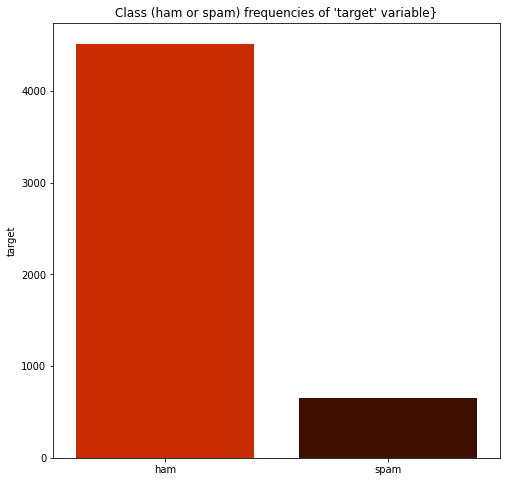

In [11]:
plt.figure(figsize = [8, 8], clear = True, facecolor = "white")

sns.barplot(x = data["target"].value_counts().index,
            y = data["target"].value_counts(), palette = ["#C82C02", "#410F01"],
            saturation = 1).set(title = "Class (ham or spam) frequencies of 'target' variable}");

In [12]:
fig = px.pie(data_frame = data, names = "target", hole = 0.4, title = "counts in 'target' variable", 
             width = 1000, height = 500, color_discrete_sequence = px.colors.sequential.Sunset_r)

fig.update_traces(textposition = "inside", textinfo = "percent+label",
                  marker = dict(line = dict(width = 1.5, color = "#410F01")))

fig.update_layout(title_x = 0.5, title_font = dict(size = 30), uniformtext_minsize = 25)

fig.show()

In [13]:
data["ch_no"] = data["text"].apply(len)
data["wd_no"] = data.apply(lambda row: nltk.word_tokenize(row["text"]), axis=1).apply(len)
data["sn_no"] = data.apply(lambda row: nltk.sent_tokenize(row["text"]), axis=1).apply(len)

data.describe().T.style.background_gradient(cmap = "Purples_r")

,count,mean,std,min,25%,50%,75%,max
ch_no,5169.000000,78.977945,58.236293,2.000000,36.000000,60.000000,117.000000,910.000000
wd_no,5169.000000,18.453279,13.324793,1.000000,9.000000,15.000000,26.000000,220.000000
sn_no,5169.000000,1.947185,1.362406,1.000000,1.000000,1.000000,2.000000,28.000000


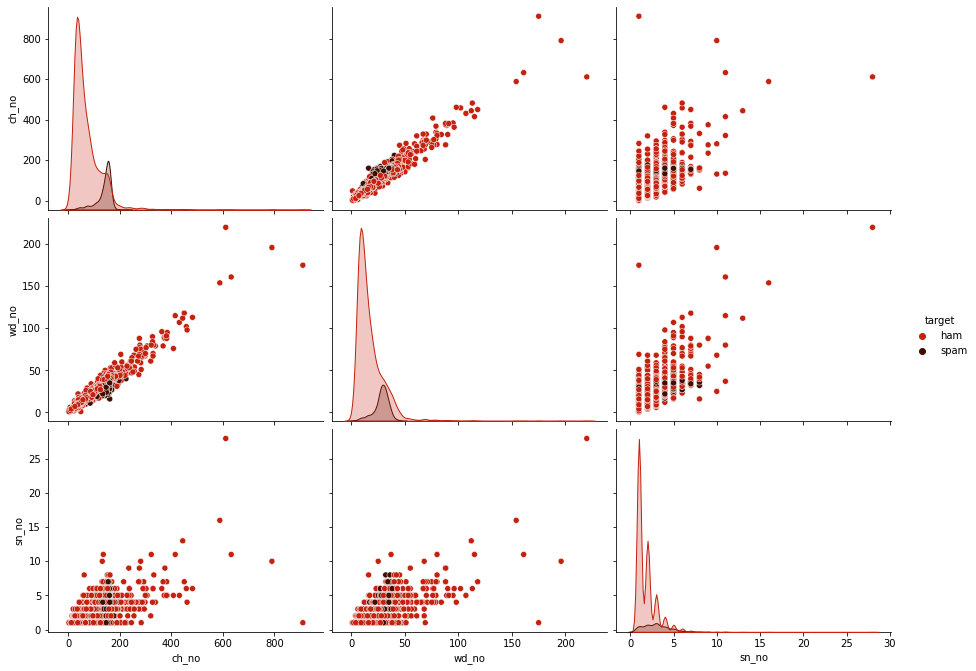

In [14]:
fig = sns.pairplot(data = data, hue = "target", palette = ["#C4210E", "#410F01"], height = 3.15, aspect = 1.35)
plt.show(fig);

<div style="border:2px solid #030833; border-radius:10px;  background:#fff;">
    <div style="padding:10px 10px 10px 0px; margin:2px; border-radius:10px; background:#410F01;">
        <span style="margin-left:15px; font-family:sans-serif; font-size:20px; color:#fff;">Data cleaning... 🧹</span>
    </div>
</div>

### <span style = "background:#410F01; border:black solid; font-size:100%; color:#fff; border-radius:5px;">Convert uppercase letters to lowercase letters</span>

In [15]:
data["text"] = data["text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

print(colored("\nUPPERCASE LETTERS WERE SUCCESFULLY CONVERTED INTO LOWERCASE LETTERS...", color = "green", attrs = ["bold", "dark"]))


UPPERCASE LETTERS WERE SUCCESFULLY CONVERTED INTO LOWERCASE LETTERS...


### <span style = "background:#410F01; border:black solid; font-size:100%; color:#fff; border-radius:5px;">Delete punctuation marks</span>

In [16]:
data["text"] = data["text"].str.replace('[^\w\s]','')

print(colored("\nPUNCTUATION MARKS WERE SUCCESFULLY DELETED...", color = "green", attrs = ["bold", "dark"]))


PUNCTUATION MARKS WERE SUCCESFULLY DELETED...


### <span style = "background:#410F01; border:black solid; font-size:100%; color:#fff; border-radius:5px;">Delete numbers from texts
</span>

In [17]:
data["text"] = data["text"].str.replace('\d','')

print(colored("\nNUMBERS WERE SUCCESFULLY DELETED...", color = "green", attrs = ["bold", "dark"]))


NUMBERS WERE SUCCESFULLY DELETED...


### <span style = "background:#410F01; border:black solid; font-size:100%; color:#fff; border-radius:5px;">Delete stopwords and punctuation</span>

In [18]:
stop_words = set(stopwords.words("english"))
punctuation = list(string.punctuation)
stop_words.update(punctuation)

data["text"] = data["text"].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

print(colored("\nSTOPWORDS AND PUNCTUATION WERE SUCCESFULLY DELETED ...", color = "green", attrs = ["bold", "dark"]))


STOPWORDS AND PUNCTUATION WERE SUCCESFULLY DELETED ...


### <span style = "background:#410F01; border:black solid; font-size:100%; color:#fff; border-radius:5px;">Lemmatization. That is, we get the roots of the words</span>

In [19]:
data["text"] = data["text"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

print(colored("\nTEXTS WERE SUCCESFULLY LEMMATIZED...", color = "green", attrs = ["bold", "dark"]))


TEXTS WERE SUCCESFULLY LEMMATIZED...


### <span style = "background:#410F01; border:black solid; font-size:100%; color:#fff; border-radius:5px;">Remove URLs from texts if there is any</span>

In [20]:
data["text"] = data["text"].apply(lambda x: " ".join(re.sub(r'http\S+', '', x) for x in x.split()))

print(colored("\nURLs WERE SUCCESFULLY REMOVED...", color = "green", attrs = ["bold", "dark"]))


URLs WERE SUCCESFULLY REMOVED...


### <span style = "background:#410F01; border:black solid; font-size:100%; color:#fff; border-radius:5px;">Remove words less than 3 letters long</span>

In [21]:
data["text"] = data["text"].apply(lambda x: ' '.join([x for x in x.split() if len(x) > 3]))

print(colored("\nWORDS LESS THAN 3 LETTERS LONG WERE SUCCESFULLY REMOVED...", color = "green", attrs = ["bold", "dark"]))


WORDS LESS THAN 3 LETTERS LONG WERE SUCCESFULLY REMOVED...


### <span style = "background:#410F01; border:black solid; font-size:100%; color:#fff; border-radius:5px;">Look at the latest condition of the dataset</span>

In [22]:
data.head(n = 10)

,target,text,ch_no,wd_no,sn_no
0,ham,jurong point crazy available bugis great world buffet cine amore,111,24,2
1,ham,joking,29,8,2
2,spam,free entry wkly comp final tkts text receive entry questionstd ratetcs apply over,155,37,2
3,ham,early already,49,13,1
4,ham,dont think life around though,61,15,1
5,spam,freemsg darling week word back like still chgs send,148,39,4
6,ham,even brother like speak treat like patent,77,18,2
7,ham,request melle melle minnaminunginte nurungu vettam callertune caller press copy friend callertune,160,31,2
8,spam,winner valued network customer selected receivea prize reward claim call claim code valid hour,158,32,5
9,spam,mobile month entitled update latest colour mobile camera free call mobile update free,154,31,3


### <span style = "background:#410F01; border:black solid; font-size:100%; color:#fff; border-radius:5px;">Get every words from dataset and append them to 'corpus' list</span>

In [23]:
corpus = []
for i in data.text:
    for j in i.split():
        corpus.append(j.strip())

### <span style = "background:#410F01; border:black solid; font-size:100%; color:#fff; border-radius:5px;">Count the words</span>

In [24]:
counter = Counter(corpus)
common_words = counter.most_common(15)
dict(common_words)

{'call': 509,
 'dont': 258,
 'ltgt': 254,
 'know': 248,
 'free': 245,
 'like': 234,
 'come': 228,
 'time': 224,
 'good': 218,
 'want': 208,
 'text': 197,
 'love': 184,
 'need': 178,
 'send': 165,
 'going': 165}

### <span style = "background:#410F01; border:black solid; font-size:100%; color:#fff; border-radius:5px;">Visualisation with wordcloud</span>

<function matplotlib.pyplot.show(close=None, block=None)>

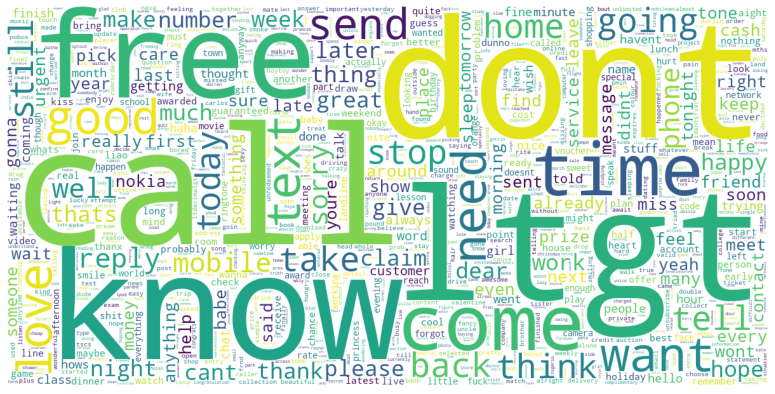

In [25]:
text = " ".join(i for i in data.text)

wc = WordCloud(background_color = "white", width = 1200, height = 600,
               contour_width = 0, contour_color = "#410F01", max_words = 1000,
               scale = 1, collocations = False, repeat = True, min_font_size = 1)

wc.generate(text)

plt.figure(figsize = [15, 7])
plt.imshow(wc)
plt.axis("off")
plt.show

### <span style = "background:#410F01; border:black solid; font-size:100%; color:#fff; border-radius:5px;">Distribution of average word length</span>

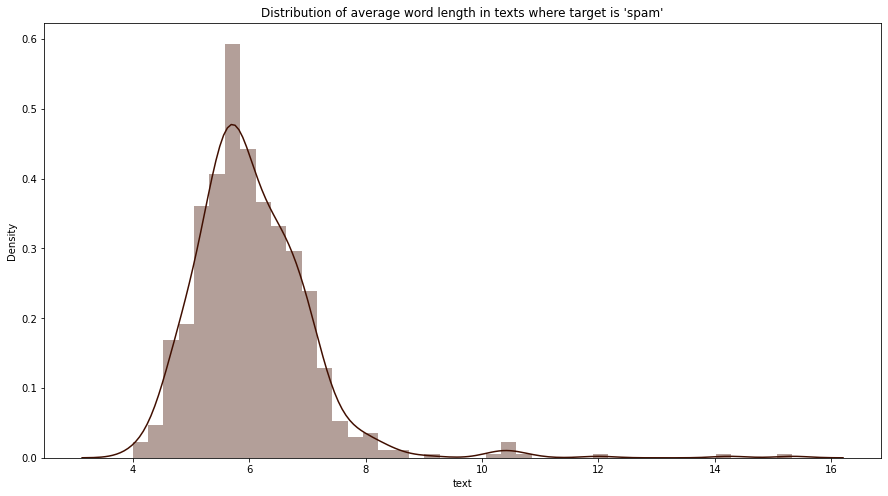

In [26]:
fig,ax = plt.subplots(figsize = (15, 8))
text_words = data[data["target"] == "spam"]["text"].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(text_words.map(lambda x: np.mean(x)), color = "#410F01", ax = ax).set_title("Distribution of average word length in texts where target is 'spam'");

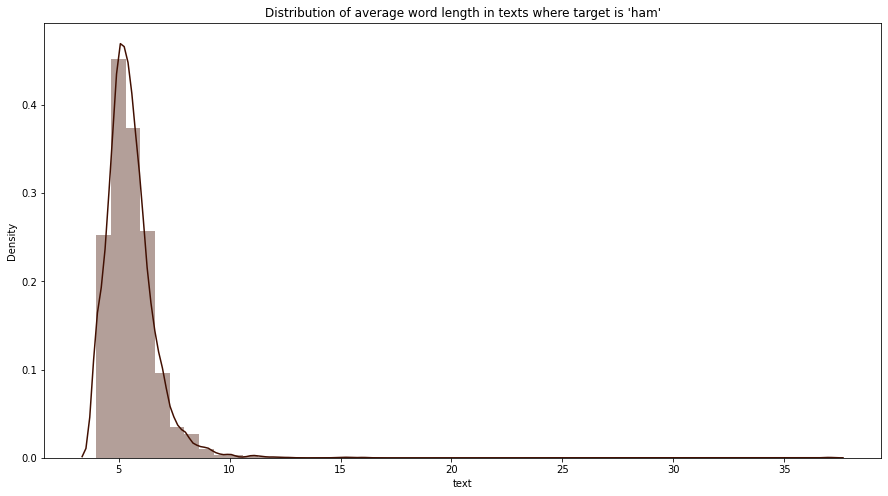

In [27]:
fig,ax = plt.subplots(figsize = (15, 8))
text_words = data[data["target"] == "ham"]["text"].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(text_words.map(lambda x: np.mean(x)), color = "#410F01", ax = ax).set_title("Distribution of average word length in texts where target is 'ham'");

<div style="border:2px solid #030833; border-radius:10px;  background:#fff;">
    <div style="padding:10px 10px 10px 0px; margin:2px; border-radius:10px; background:#410F01;">
        <span style="margin-left:15px; font-family:sans-serif; font-size:20px; color:#fff;">Prepare data for machine learning models... </span>
    </div>
</div>

### <span style = "background:#410F01; border:black solid; font-size:100%; color:#fff; border-radius:5px;">Encode target variable with LabelEncoder</span>

In [28]:
lb = LabelEncoder()
data["target"] = lb.fit_transform(data["target"])

### <span style = "background:#410F01; border:black solid; font-size:100%; color:#fff; border-radius:5px;">Divide the dataset into test and train sets</span>

In [29]:
x = data["text"]
y = data["target"]

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.20, shuffle = True, random_state = 11)

print(colored("\nDATASET WAS SUCCESFULLY DIVIDED ...", color = "green", attrs = ["bold", "dark"]))


DATASET WAS SUCCESFULLY DIVIDED ...


### <span style = "background:#410F01; border:black solid; font-size:100%; color:#fff; border-radius:5px;">Shape of train_x and test_x</span>

In [30]:
print("The shape of 'train_x' is {} and the shape of 'test_x' is {}".format(train_x.shape[0], test_x.shape[0]))

The shape of 'train_x' is 4135 and the shape of 'test_x' is 1034


### <span style = "background:#410F01; border:black solid; font-size:100%; color:#fff; border-radius:5px;">Tokenizing and padding</span>

In [31]:
tokenizer = Tokenizer(num_words = None)
tokenizer.fit_on_texts(train_x)

tokenized_train = tokenizer.texts_to_sequences(train_x)
tokenized_test = tokenizer.texts_to_sequences(test_x)

train_x = sequence.pad_sequences(tokenized_train, maxlen = None)
test_x = sequence.pad_sequences(tokenized_test, maxlen = None)

### <span style = "background:#410F01; border:black solid; font-size:100%; color:#fff; border-radius:5px;">Global vector (glove) embedding</span>

In [32]:
GLOVE_EMBEDDING = "../input/glove-twitter/glove.twitter.27B.100d.txt"

In [33]:
def get_coefs(word, *arr):
    return word, np.asarray(arr, dtype = "float32")
embeddings_index = dict(get_coefs(*g.rstrip().rsplit(" ")) for g in open(GLOVE_EMBEDDING))

#_________________________________________________________________________________________#

#_________________________________________________________________________________________#

embeddings = np.stack(embeddings_index.values())
embedding_mean, embedding_std = embeddings.mean(), embeddings.std()
embedding_size = embeddings.shape[1]

word_index = tokenizer.word_index
nb_words = min(6012, len(word_index))+1

embedding_matrix = embedding_matrix = np.random.normal(embedding_mean, embedding_std, (nb_words, embedding_size))
for word, i in word_index.items():
    if i >= 6012:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

### <span style = "background:#410F01; border:black solid; font-size:100%; color:#fff; border-radius:5px;">Define callbacks</span>

In [34]:
lr_reduce = ReduceLROnPlateau(monitor = "val_accuracy", patience = 2, factor = 0.5, min_lr = 0.00001)

### <span style = "background:#410F01; border:black solid; font-size:100%; color:#fff; border-radius:5px;">Deep learning model</span>

In [35]:
model = Sequential()

model.add(Embedding(6013, output_dim = 100, weights = [embedding_matrix], trainable = False))

model.add(LSTM(units = 128, return_sequences = True, recurrent_dropout = 0.3, dropout = 0.5))

model.add(LSTM(units = 64, recurrent_dropout = 0.3, dropout = 0.5))

model.add(Dense(units = 32, activation = "relu"))

model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.01), loss = "binary_crossentropy", metrics = ["accuracy"])

2022-12-01 08:47:55.819252: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-01 08:47:55.823625: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-01 08:47:55.824375: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-01 08:47:55.826201: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         601300    
_________________________________________________________________
lstm (LSTM)                  (None, None, 128)         117248    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 770,069
Trainable params: 168,769
Non-trainable params: 601,300
_________________________________________________________________


In [37]:
history = model.fit(train_x,
                    train_y,
                    batch_size = 64,
                    validation_data = (test_x, test_y),
                    epochs = 20,
                    callbacks = [lr_reduce])

2022-12-01 08:47:59.449768: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
65/65 [==============================] - 44s 601ms/step - loss: 0.1652 - accuracy: 0.9369 - val_loss: 0.1571 - val_accuracy: 0.9632
Epoch 2/20
65/65 [==============================] - 39s 606ms/step - loss: 0.1073 - accuracy: 0.9632 - val_loss: 0.1453 - val_accuracy: 0.9555
Epoch 3/20
65/65 [==============================] - 39s 596ms/step - loss: 0.0844 - accuracy: 0.9717 - val_loss: 0.1105 - val_accuracy: 0.9671
Epoch 4/20
65/65 [==============================] - 39s 595ms/step - loss: 0.0790 - accuracy: 0.9746 - val_loss: 0.1417 - val_accuracy: 0.9632
Epoch 5/20
65/65 [==============================] - 38s 590ms/step - loss: 0.0654 - accuracy: 0.9778 - val_loss: 0.1305 - val_accuracy: 0.9662
Epoch 6/20
65/65 [==============================] - 39s 605ms/step - loss: 0.0532 - accuracy: 0.9814 - val_loss: 0.1485 - val_accuracy: 0.9700
Epoch 7/20
65/65 [==============================] - 39s 599ms/step - loss: 0.0445 - accuracy: 0.9855 - val_loss: 0.1501 - val_accuracy: 0.9681

In [38]:
print("Model accuracy on the train set: ", model.evaluate(train_x, train_y)[1])
print("Model accuracy on the test set: ", model.evaluate(test_x, test_y)[1])

130/130 [==============================] - 5s 36ms/step - loss: 0.0049 - accuracy: 0.9985
Model accuracy on the train set:  0.9985489845275879
33/33 [==============================] - 1s 23ms/step - loss: 0.1664 - accuracy: 0.9729
Model accuracy on the test set:  0.9729207158088684


### <span style = "background:#410F01; border:black solid; font-size:100%; color:#fff; border-radius:5px;">Visualization of the model percent</span>

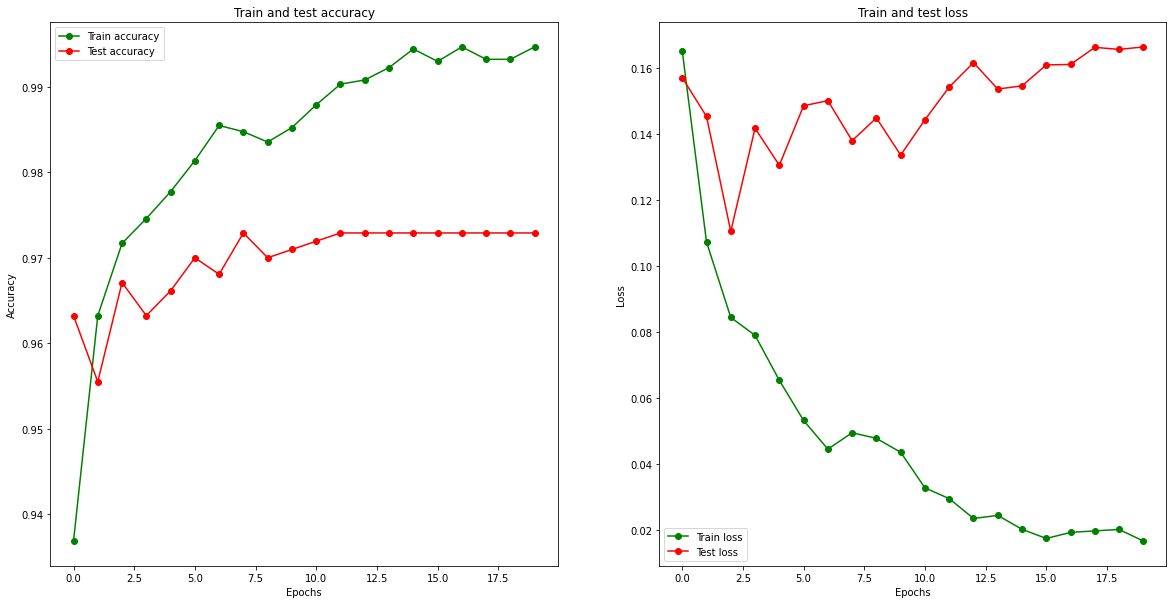

In [39]:
epochs = [i for i in range(20)]

fig, ax = plt.subplots(1, 2)
train_acc = history.history["accuracy"]
train_loss = history.history["loss"]
val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]
fig.set_size_inches(20, 10)

ax[0].plot(epochs, train_acc, "go-", label = "Train accuracy")
ax[0].plot(epochs, val_acc, "ro-", label = "Test accuracy")
ax[0].set_title("Train and test accuracy")
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs, train_loss, "go-", label = "Train loss")
ax[1].plot(epochs, val_loss, "ro-", label = "Test loss")
ax[1].set_title("Train and test loss")
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [40]:
prediction = model.predict(test_x)
classes_pred = np.argmax(prediction, axis = 1)

print(classification_report(test_y, classes_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       896
           1       0.00      0.00      0.00       138

    accuracy                           0.87      1034
   macro avg       0.43      0.50      0.46      1034
weighted avg       0.75      0.87      0.80      1034



[[896   0]
 [138   0]]


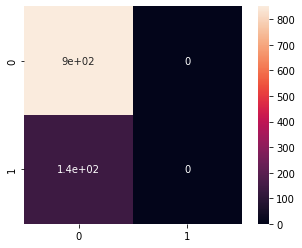

In [41]:
conf_mat = confusion_matrix(test_y, classes_pred)
print(conf_mat)

sns.heatmap(conf_mat, square = True, annot = True, robust = True)
plt.show()